<a href="https://colab.research.google.com/github/svhenrique/analise-dataset-heart-disease/blob/master/semana5/Untitled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dados sobre a venda de casas no King Coundy (Condado de King), EUA**


*   O dataset contém 21 recursos quer podem ser usados para previsão de preços de casas no Condado de King.
*   O dataset contém os preços das casas vendidas entre maio de 2014 e maio de 2015. 
*   [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction/tasks)
* Descrição dos atributos:
  * id
    * indice das instâncias
  * date
    * data de compra
  * price 
    * valor da compra
  * bedrooms 
    * quantidade de quartos
  * bathrooms 
    * quantidade de banheiros por quarto, onde 0.5 corresponde a um banheiro com privada, mas sem chuveiro
  * sqft_living
    * metragem quadrada do espaço interior dos apartamentos
  * sqft_lot 
    * netragem quadrada do terrono inteiro
  * floors
    * quantidade de escadas
  * waterfront 
    * valor boleano indicando se a casa tem vista para o mar ou não
  * view 
    * um índice de 0 a 4 de quão boa é a vista na propriedade
    * **TESTAR com waterfront, pois, se não tiverem correlação então deve ficar "DA PROPRIEDADE e não NA PRORIEDADE"**
  * condition 
    * um índice de 1 a 5 na condição do apartamento
  * grade
    * um índice de 1 a 13, onde 
      * 1 a 3 a construção e design do edifício não foram tão boas quanto o esperado
      * 7 a 10 tem um nível médio de construção e design 
      * 11a 13 tem um nível de construção e design de alta qualidade
  * sqft_above
    * a metragem quadrada do espaço habitacional interior acima do nível do solo
    * é o espaço que fica além do porão (casas com porões são comuns nos EUA)
  * sqft_basement 
    * a metragem quadrada do espaço interno da habitação que está abaixo do nível do solo
    * espaço a partir do porão e para baixo
  * yr_built
    * o ano da construção da casa
  * yr_renovated
    * o ano da última reforma da casa
  * zipcode
    * qual é a área do código postal da casa
    * **Zip Code é...**
  * lat 
    * coordenada de latitude
  * long
    * coorenada de longitude
  * sqft_living15 
    * a metragem quadrada do espaço interno das casas para os 15 vizinhos mais próximos
  * sqft_lot15
    * a metragem quadrada dos lotes de terra dos 15 vizinhos mais próximos
* 21613 instâncias
* Problema de regressão




## **1. Importando as bibliotecas necessárias**

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **2. Lendo os dados do dataset**

In [ ]:
dados = pd.read_csv("https://raw.githubusercontent.com/svhenrique/analise-dataset-heart-disease/master/semana5/kc_house_data.csv")

In [ ]:
dados.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
dados

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
print(f'Quantidade de Instâncias: {len(dados)} ')

Quantidade de Instâncias: 21613 


## **3. Limpando e organizando os dados** 

In [ ]:
# verificando se existem valores NAN, ? ou dados faltantes
dados.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [ ]:
# eu irei excluir a coluna id pois o pandas utiliza um sistema de id's melhor de se usar

dados = dados.drop(columns=['id'])

In [ ]:
# mostrando dados após exclusão da coluna id
dados.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# formatando a coluna "date" para maior usabilidade 
dados.date = pd.to_datetime(dados.date,format='%Y%m%dT000000').dt.date

In [ ]:
# mostrando dados após a modificação da coluna "date"
dados.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# excluindo a data da instância, pois não será preciso na modelagem

dados = dados.drop(columns=['date'])

## **4. Análise preliminar dos dados**


### **Análise geral dos dados**

In [ ]:
# mostrando vários aspectos dos dados
dados.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


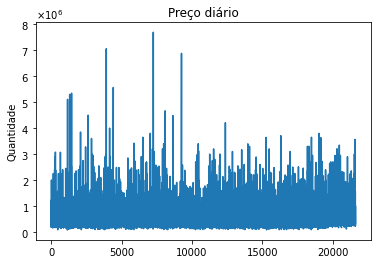

In [ ]:
# série temporal dos preços 

# observar que na cordenada y existe notação Científica 

plt.plot(dados.price)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.ylabel('Quantidade')
plt.title('Preço diário')
plt.show()

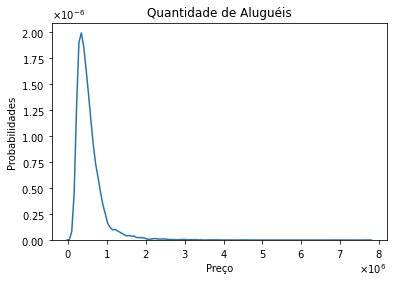

In [ ]:
# distribuição de probabilidade dos preços 

sns.distplot(dados.price, hist=False, rug=False)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
plt.xlabel('Preço')
plt.ylabel('Probabilidades')
plt.title('Quantidade de Aluguéis')

plt.show()

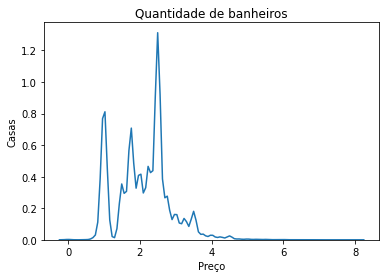

In [ ]:
# distribuição de probabilidade dos banheiros 

sns.distplot(dados.bathrooms, hist=False, rug=False)
plt.xlabel('Preço')
plt.ylabel('Casas')
plt.title('Quantidade de banheiros')

plt.show()

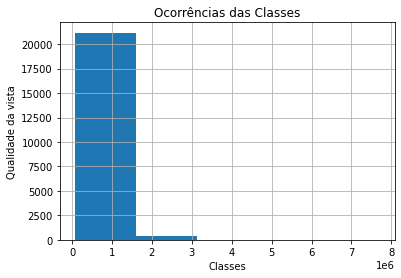

In [ ]:
plt.hist(dados['price'], 5)
plt.xlabel('Classes')
plt.ylabel('Qualidade da vista')
plt.title('Ocorrências das Classes')
plt.grid(True)
plt.show()

**Usando boxplot para comparar tipos de atributos com o preço**

Usarei o gráfico de boxplot para a comparação de bedrooms, floors ou bathrooms com price, pois os atributos comparados com o price são dados números, porém não continuos (em geral com alguams exceções em bathrooms e floors que serão explicadas a frente).

Observação: Não irei tratar os outliers pois, ao meu ver, isso se trata de uma questão mais "luxuosa", preços mais altos são uma característica dos dados, logo, não vejo razão para tratamento.

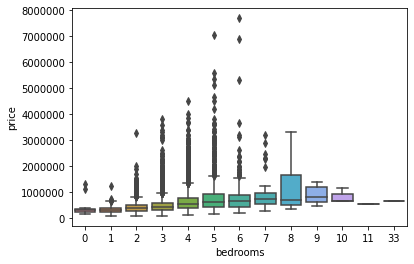

In [ ]:
# boxplot comparando a quantidade de quartos com o preço

plt.ticklabel_format(useOffset=False, style='plain')
sns.boxplot(x=dados['bedrooms'],y=dados['price'])
plt.show()



---


**price e bedrooms**

Podemos observar que não necessariamente quanto mais quartos, maior é o preço.  E também, uma residência com 8 quartos é, em média, mais cara quando comparada as outras (mesmo levando em conta os outliers). 


---



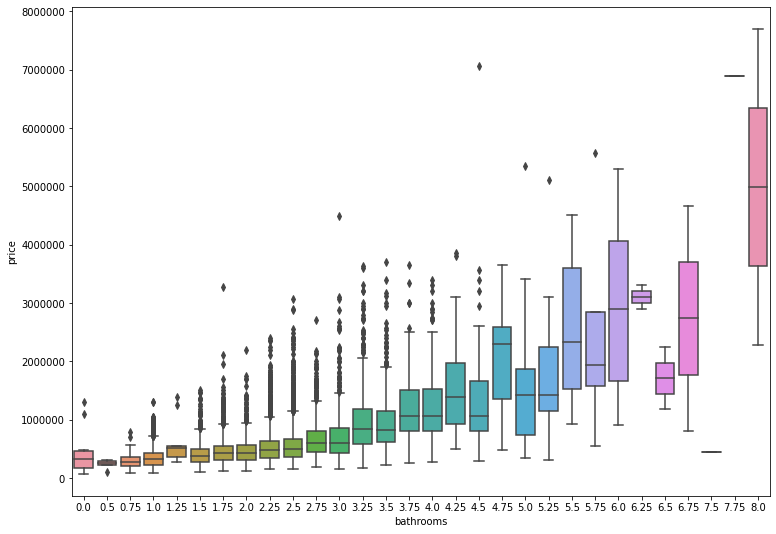

In [ ]:
# boxplot comparando a quantidade de banheiros com o preço

plt.figure(figsize=(12.5,9)) 
plt.ticklabel_format(useOffset=False, style='plain')
sns.boxplot(x=dados['bathrooms'],y=dados['price'])
plt.show()

**price e bathrooms**

* Podemos observar que a relação entre o preço e o número de banheiros tende a ser crescente (se um aumenta o outro também aumenta).
* Alguns casos como o índice 7.5, que está com um preço bem abaixo do esperado se comparado aos outros preços/banheiros, podem indicar algumas coisas:
  * Poucos dados com essa característica.
  * Os outros atributos das residências com essa característica podem ser inversamente  proporcional ao preço.
  * Algum tipo de promoção na compra das residências com essa característica ou outro fator para a queda do preço
* Observar que um valor de 0.5 é dado para os banheiros que tem privada mas não tem choveiro.



In [ ]:
# resetando tamanho da figura para o padrão

plt.rcParams["figure.figsize"] = (6.0, 4.0)

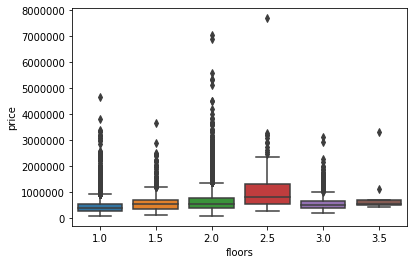

In [ ]:
# boxplot comparando a quantidade de escadas com o preço

plt.ticklabel_format(useOffset=False, style='plain')
sns.boxplot(x=dados['floors'],y=dados['price'])
plt.show()

**price e floors**

A relação entre o preço e a quantidade de escadas em uma residência não é 
necessariamente crescente.

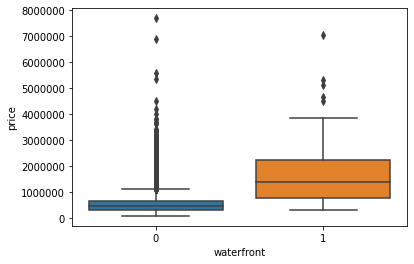

In [ ]:
# boxplot comparando o preço de residências com vista para o mar

plt.ticklabel_format(useOffset=False, style='plain')
sns.boxplot(x=dados['waterfront'],y=dados['price'])
plt.show()

**price e waterfront**

É possível observar que se uma residência tem vista para o mar, o preço tende a ser maior.

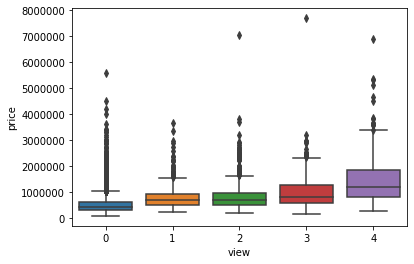

In [ ]:
# boxplot comparando o quão boa é a vista na propriedade com o preço

plt.ticklabel_format(useOffset=False, style='plain')
sns.boxplot(x=dados['view'],y=dados['price'])
plt.show()

**price e view**

A relação entre o estado de aparência do apartamento e o preço tende a ser crescente (se um aumenta o outro também aumenta).

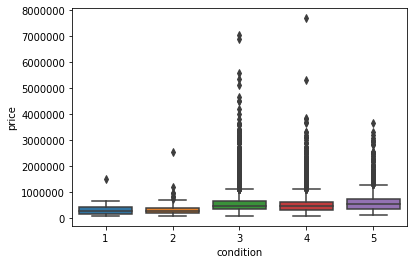

In [ ]:
# boxplot comparando condição da propriedade com o preço

plt.ticklabel_format(useOffset=False, style='plain')
sns.boxplot(x=dados['condition'],y=dados['price'])
plt.show()

**price e condition**

A relação entre o preço e a condição da propriedade não é, necessariamentem, crescente. Imagino que a condição do apartamento não é uma variável analisada com critério pelas pessoas, sendo preferível a aparência da residência (que é medida com o campo view).




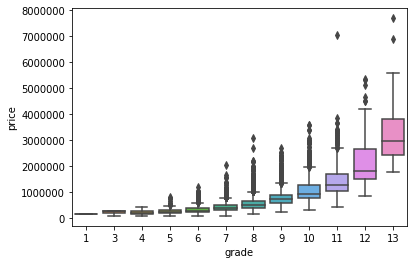

In [ ]:
# boxplot comparando o estado da construção e design da propriedade com o preço

plt.ticklabel_format(useOffset=False, style='plain')
sns.boxplot(x=dados['grade'],y=dados['price'])
plt.show()

**price e grade**

Aqui o gráfico mostra claramente que a relação entre o preço e o nível de qualidade da construção e design da residência é crescente (se um aumenta o outro também aumenta).

### **Estudo de correlação entre atributos**



---
**Usando gráfico de dispersão em 3º dimensão**

Agora usarei gráficos em 3d para a comparação de 2 tipos de atributos com o preço.


---




In [ ]:
# redimensionar para facilitar vizualização de gráfico 3d
plt.rcParams["figure.figsize"] = (14,11)

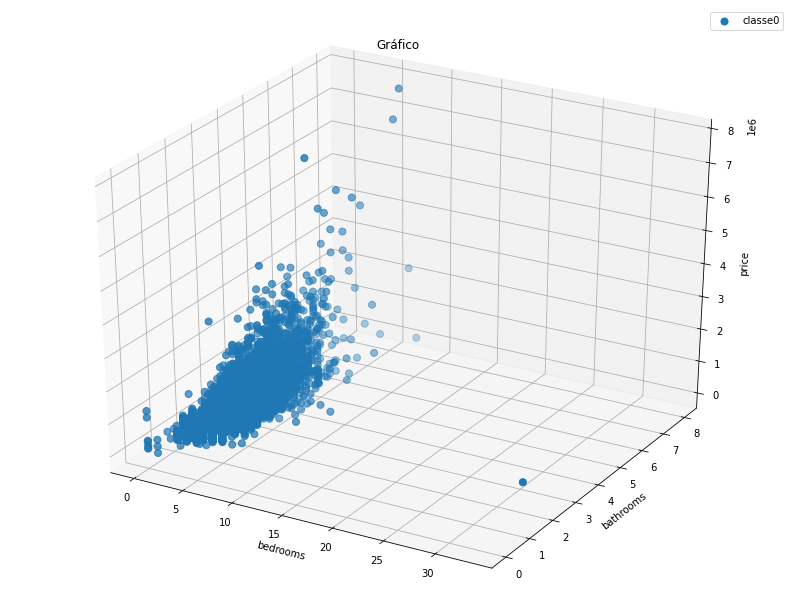

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(dados.bedrooms,dados.bathrooms,dados.price,s=50,label='classe0')
plt.legend()
ax.set_xlabel('bedrooms')
ax.set_ylabel('bathrooms')
ax.set_zlabel('price')
plt.title('Gráfico')
plt.show()

**price, bedrooms e bathrroms**

Podemos ver que, quanto mais banheiros, mas alto é o preço das residências. O estranho é que a quantidade de quartos não parece afetar tanto o preço ou a variação entre a quantidade de quartos é bem baixa, deixando a ilusão de que não afeta tanto o preço. Irei fazer um gráfico de disperssão em 2d para analisar a correlação dos preços e dos quartos.

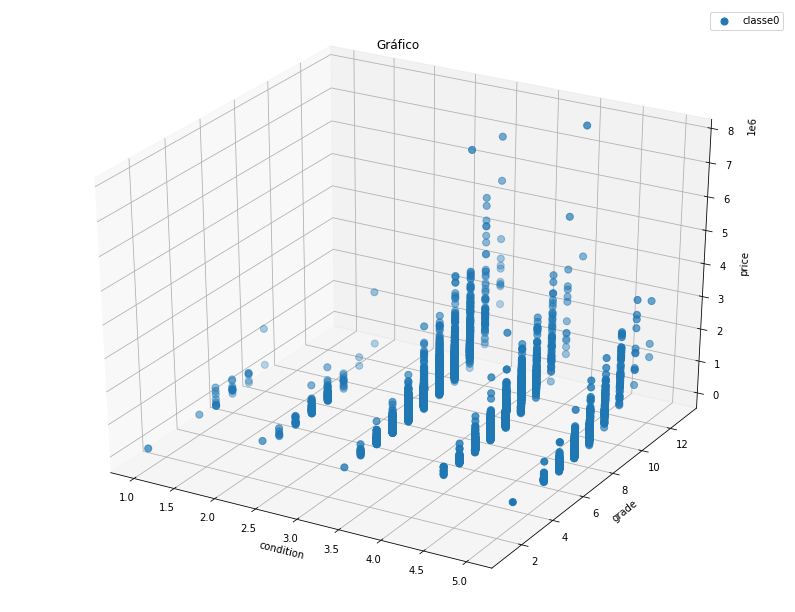

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(dados.condition,dados.grade,dados.price,s=50,label='classe0')
plt.legend()
ax.set_xlabel('condition')
ax.set_ylabel('grade')
ax.set_zlabel('price')
plt.title('Gráfico')
plt.show()

**condition, grade e price**

Com o gráfico fica claro que, quanto maior é a qualidade da construção e design, maior é o preço. A qualidade da construção (condition) não parece ter correlação com o preço.

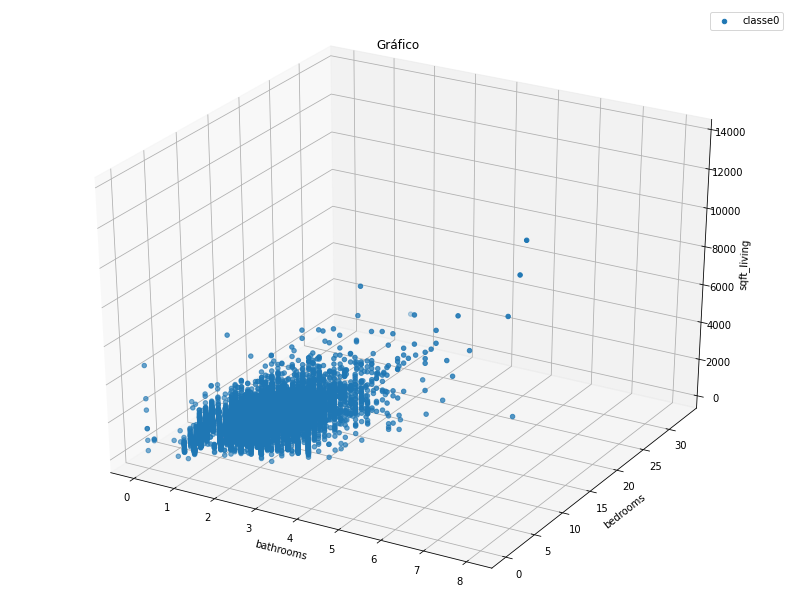

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(dados.bathrooms,dados.bedrooms,dados.sqft_living,label='classe0')
plt.legend()
ax.set_xlabel('bathrooms')
ax.set_ylabel('bedrooms')
ax.set_zlabel('sqft_living')
plt.title('Gráfico')
plt.show()

**bathrooms, bedrooms e sqft_living**

Não ficou nada muito claro nesse gráfico. Mais análise é requerida.

No handles with labels found to put in legend.


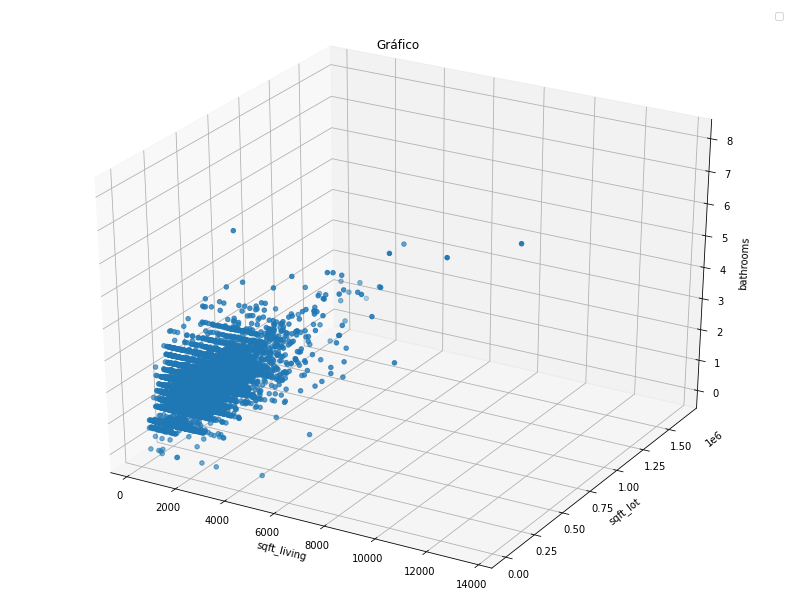

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(dados.sqft_living,dados.sqft_lot,dados.bathrooms)
plt.legend()
ax.set_xlabel('sqft_living')
ax.set_ylabel('sqft_lot')
ax.set_zlabel('bathrooms')
plt.title('Gráfico')
plt.show()

**sqft_living, sqft_lot e bathrooms**

Aqui podemos perceber que, quanto mais banheiros, maior será o sqft_living. o sqft_lot não parece ter uma correlação positiva grande com o sqft_living, e isso és estranho pois os dois são representações do tamanho do espaço da residência.

In [ ]:
# resetando tamanho da figura para o padrão

plt.rcParams["figure.figsize"] = (6.0, 4.0)

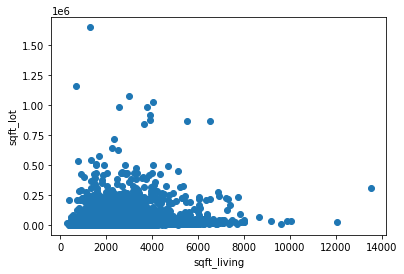

0.17282566132360033

In [ ]:
# plotando correlação entre sqft_living e sqft_lot
plt.scatter(dados.sqft_living, dados.sqft_lot)
plt.xlabel('sqft_living')
plt.ylabel('sqft_lot')
plt.show()
dados.sqft_living.corr(dados.sqft_lot)

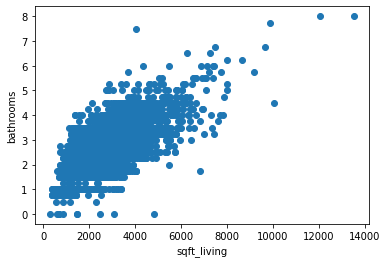

0.7546652789673731

In [ ]:
# plotando correlação entre sqft_living e bathrooms
plt.scatter(dados.sqft_living, dados.bathrooms)
plt.xlabel('sqft_living')
plt.ylabel('bathrooms')
plt.show()
dados.sqft_living.corr(dados.bathrooms)

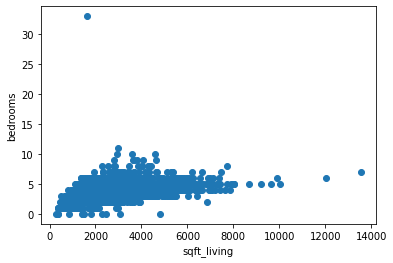

0.5766706925022437

In [ ]:
# plotando correlação entre sqft_living e bedrooms
plt.scatter(dados.sqft_living, dados.bedrooms)
plt.xlabel('sqft_living')
plt.ylabel('bedrooms')
plt.show()
dados.sqft_living.corr(dados.bedrooms)

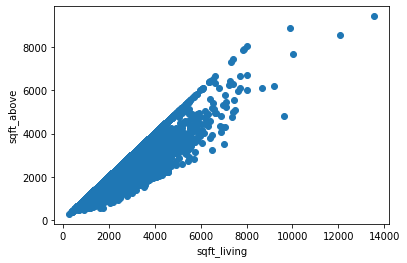

0.876596598681318

In [ ]:
# plotando correlação entre sqft_living e sqft_above
plt.scatter(dados.sqft_living, dados.sqft_above)
plt.xlabel('sqft_living')
plt.ylabel('sqft_above')
plt.show()
dados.sqft_living.corr(dados.sqft_above)

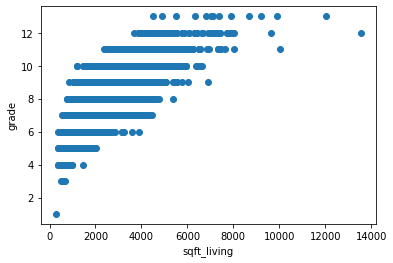

0.7627044764584696

In [ ]:
# plotando correlação entre sqft_living e grade
plt.scatter(dados.sqft_living, dados.grade)
plt.xlabel('sqft_living')
plt.ylabel('grade')
plt.show()
dados.sqft_living.corr(dados.grade)

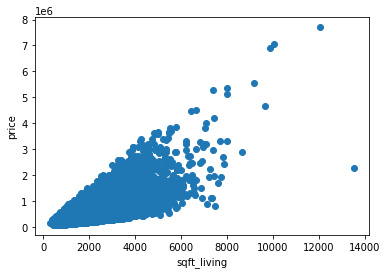

0.7020350546118002

In [ ]:
# plotando correlação entre sqft_living e price
plt.scatter(dados.sqft_living, dados.price)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()
dados.sqft_living.corr(dados.price)



---

Eu não vou fazer gráfico de disperssão para todos os tipos de atributo pois eles são muitos, deixando a análise maçante e de difícil interpretação. Para contornar esse problema, irei fazer um gráfico de calor mostrando o coeficiente de correlação, facilitando a interpretação e deixando a análise mais sucinta.


---



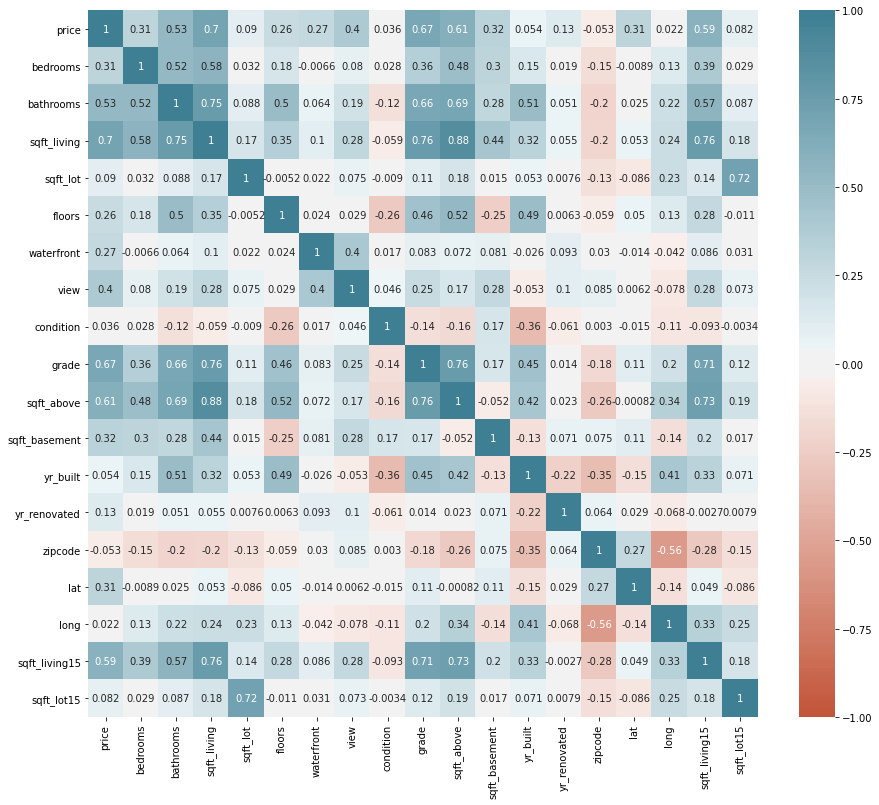

In [ ]:
# plotando coeficientes de correlação em um mapa de calor
# Ele mostra, também, o coeficiente de correlação no mapa de calor

plt.rcParams["figure.figsize"] = (15, 13)
sns.heatmap(dados.corr(),vmin=-1, vmax=1, annot=True, center=0,cmap=sns.diverging_palette(20, 220, n=200))

In [ ]:
# resetando tamanho da figura para o padrão

plt.rcParams["figure.figsize"] = (6.0, 4.0)

**Conclusão sobre o mapa de calor**

Podemos observar que:
  * A correlação positiva máxima é das colunas sqft_living e sqft_above.
    * É importante ressaltar que colunas com um alto nível de correlação podem causar overfitting. Logo, é necessário analisar a possibilidade de exclusão de uma das duas colunas com a correlação positiva mais alta.
  * A correlação negativa mínima é das colunas zipcode e long:
    * Essa correlação negativa entre os dois não faz sentido devido ao significado atribuido aos mesmos.
  * Outras correlações importantes podem ser observadas, tais como:
    * Correlação positiva de price e sqft_living, price e sqft_above, price e grade, price e sqft_living15,e price e bathrooms.
  
    

Existem muitos recursos no dataset usado, o que pode ser algo ruim. Muitos recursos podem ser a razão de piores resultados ou mesmo de overfitting. Portanto, existe a possibilidade de exclusão de algums dos recursos para a melhorar a eficiência do modelo.


## **5. Reescala dos dados**

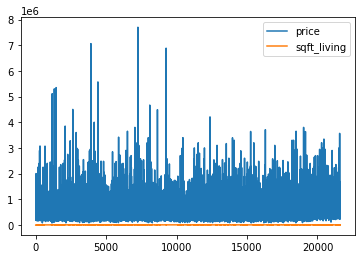

In [ ]:
# plotando price e sqft_living em um mesmo gráfico

plt.plot(dados.price,label='price')
plt.plot(dados.sqft_living,label='sqft_living')
plt.legend()
plt.show()

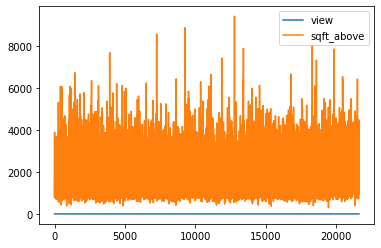

In [ ]:
# plotando view e sqft_above em um mesmo gráfico

plt.plot(dados.view,label='view')
plt.plot(dados.sqft_above,label='sqft_above')
plt.legend()
plt.show()



---

Os dados estão muito desbalanceados e, por isso, é necessário fazer a reescala dos dados. É necessário fazer a reescala dos dados pois evita que os algoritmos de aprendizado de maquina deem mais importância a recursos com escala de dados maiores.


Para a reescala, usarei o método de máximos e mínimos.


---






In [ ]:
df_re = (dados - dados.min())/(dados.max()-dados.min())
df_re.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871


## **6. Organizando os dados para modelagem**

In [ ]:
# X representa a classe dos atributos descritores
X = df_re.drop(columns=['price'])
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871


In [ ]:
# y representa os atributos de classe
y = df_re.price
y.head()

0    0.019266
1    0.060721
2    0.013770
3    0.069377
4    0.057049
Name: price, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

## **7. Treinando os modelos e fazendo previsão**

In [ ]:
# definindo modelo de regressão linear
linear = LinearRegression()
linear.fit(X_train,y_train)
pred_linear = linear.predict(X_test)

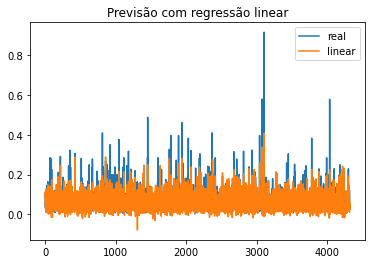

In [ ]:
# plotando resultados da MLP
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_linear,label='linear')
plt.legend()
plt.title('Previsão com regressão linear')
plt.show()



In [ ]:
# definindo modelo de árvore de decisão
arvore = DecisionTreeRegressor()
arvore.fit(X_train,y_train)
pred_arvore = arvore.predict(X_test)

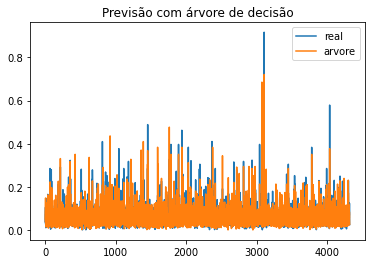

In [ ]:
# plotando resultados da árvore de decisão
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_arvore,label='arvore')
plt.legend()
plt.title('Previsão com árvore de decisão')
plt.show()

In [ ]:
# definindo modelo de random forest
floresta = RandomForestRegressor(n_estimators=150)
floresta.fit(X_train,y_train)
pred_floresta = floresta.predict(X_test)



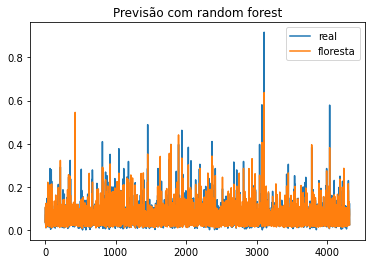

In [ ]:
# plotando resultados da random forest
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_floresta,label='floresta')
plt.legend()
plt.title('Previsão com random forest')
plt.show()



In [ ]:
# define modelo MLP
mlp = MLPRegressor(hidden_layer_sizes=(200,50),activation='logistic',max_iter=1000)
mlp.fit(X_train,y_train)
pred_mlp = mlp.predict(X_test)

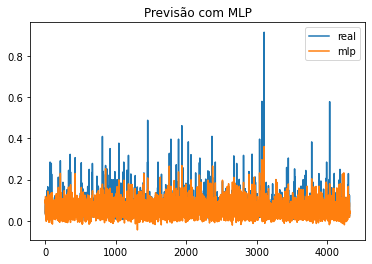

In [ ]:
# plotando resultados da MLP
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_mlp,label='mlp')
plt.legend()
plt.title('Previsão com MLP')
plt.show()



---


**Conclusão**

Com os gráficos dos resultados, é possível afirmar que a random forest e a arvore de decisão são mais promissoras para a previsão de preços no dataset usado. Porém, ainda é preciso de mais analise e isso será feito na avaliação dos modelos.


---



## **8. Avaliando Modelos**

### **Avaliando com método Holdout**

#### **Mean Absolute Error (MAE)**

In [ ]:
# Mae Linear
mael = mean_absolute_error(y_test,pred_linear)
mael

0.016338901651559132

In [ ]:
# Mae Árvore
maea = mean_absolute_error(y_test,pred_arvore)
maea

0.012410686727113459

In [ ]:
# Mae Random Forest
maer = mean_absolute_error(y_test,pred_floresta)
maer

0.00886223015957717

In [ ]:
# Mae MLP
maem = mean_absolute_error(y_test,pred_mlp)
maem

0.01721709482658275

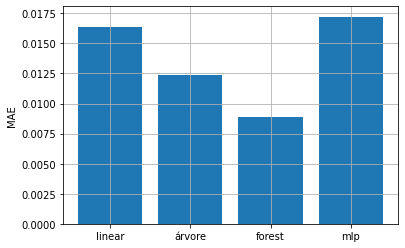

In [ ]:
# gráfico de barras comparando os valores de MAE entre os modelos
plt.bar(['linear', 'árvore', 'forest', 'mlp'], [mael, maea, maer, maem])
plt.ylabel('MAE')
plt.grid(True)
plt.show()



---

**Conclusão**

É perceptível que a random forest teve um número mais baixos de erros na previsão, segudo o método de Mean Absolute Error.


---



#### **Mean Squared Error (MSE)**

In [ ]:
# MSE linear
msel = mean_squared_error(y_test,pred_linear)
msel

0.0007094202320103164

In [ ]:
# MSE arvore
msea = mean_squared_error(y_test,pred_arvore)
msea

0.0004923047090959879

In [ ]:
# MSE random forest
mser = mean_squared_error(y_test,pred_floresta)
mser

0.0002875871436950237

In [ ]:
# MSE mlp
msem = mean_squared_error(y_test,pred_mlp)
msem

0.0008202301876189458

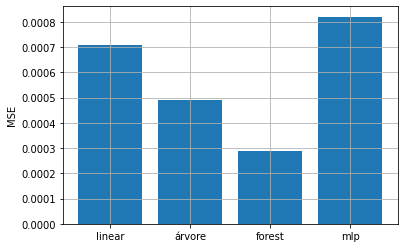

In [ ]:
# gráfico de barras comparando os valores de MSE entre os modelos
plt.bar(['linear', 'árvore', 'forest', 'mlp'], [msel, msea, mser, msem])
plt.ylabel('MSE')
plt.grid(True)
plt.show()

---

**Conclusão**

É perceptível que a random forest teve um número mais baixos de erros na previsão, segudo o método de Mean Squared Error.


---

#### **Root Mean Squared Error (RMSE)**

In [ ]:
# RMSE para regressão linear
rmsel = mean_squared_error(y_test,pred_linear)**(1/2)
rmsel

0.026634943814664157

In [ ]:
# RMSE para árvore de decisão
rmsea = mean_squared_error(y_test,pred_arvore)**(1/2)
rmsea

0.02218794062314004

In [ ]:
# RMSE para random forest
rmser = mean_squared_error(y_test,pred_floresta)**(1/2)
rmser

0.016958394490488294

In [ ]:
# RMSE para MLP
rmsem = mean_squared_error(y_test,pred_mlp)**(1/2)
rmsem

0.02863966109469429

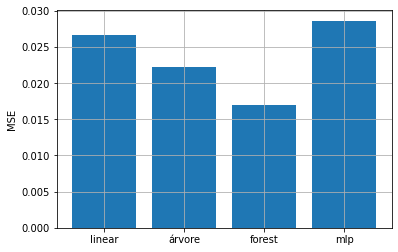

In [ ]:
# gráfico de barras comparando os valores de MSE entre os modelos
plt.bar(['linear', 'árvore', 'forest', 'mlp'], [rmsel, rmsea, rmser, rmsem])
plt.ylabel('MSE')
plt.grid(True)
plt.show()

---

**Conclusão**

É perceptível que a random forest teve um número mais baixos de erros na previsão, segudo o método de Root Mean Squared Error.


---

#### **Mean Absolute Percentage Error (MAPE)**

In [ ]:
# função para calcular MAPE
def mean_absolute_percentage_error(y_test,y_pred):
  y_test=y_test.values
  erro = 0
  for i in range(len(y_test)):
    erro += abs(y_test[i]-y_pred[i])/y_test[i]
  return erro/len(y_test)

In [ ]:
# MAPE para regressão linear
mapel = mean_absolute_percentage_error(y_test,pred_linear)
mapel

0.3407870939964739

In [ ]:
# MAPE para árvore de decisão
mapea = mean_absolute_percentage_error(y_test,pred_arvore)
mapea

0.24245688730866588

In [ ]:
# MAPE para random forest
maper = mean_absolute_percentage_error(y_test,pred_floresta)
maper

0.17962011477648443

In [ ]:
# MAPE para MLP
mapem = mean_absolute_percentage_error(y_test,pred_mlp)
mapem

0.354183160440461

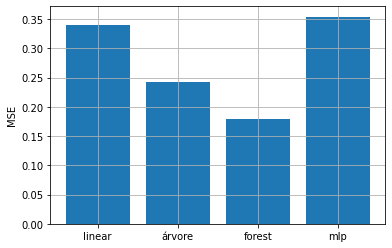

In [ ]:
# gráfico de barras comparando os valores de MSE entre os modelos
plt.bar(['linear', 'árvore', 'forest', 'mlp'], [mapel, mapea, maper, mapem])
plt.ylabel('MSE')
plt.grid(True)
plt.show()

---

**Conclusão**

É perceptível que a random forest teve um número mais baixos de erros na previsão, segudo o método de Mean Absolute Percentage Error.


---

### **Validação Cruzada**

In [ ]:
# preparando 10 folds para validação cruzada com regressão linear
linear = LinearRegression()
scores_linear = cross_val_score(linear,X,y,cv=10)
scores_linear

array([0.69572253, 0.69825289, 0.68884931, 0.69253184, 0.68095807,
       0.70406343, 0.71124795, 0.70874403, 0.69991629, 0.6715889 ])

In [ ]:
# média e desvio padrão de scores Regressão Linear
scores_linear.mean(), scores_linear.std()

(0.6951875247730418, 0.011658215480120877)

In [ ]:
# definindo modelo de árvore de decisão
arvore = DecisionTreeRegressor()
scores_arvore = cross_val_score(arvore,X,y,cv=10)
scores_arvore

array([0.79825278, 0.79119563, 0.76957085, 0.79914154, 0.66546526,
       0.6820722 , 0.75299675, 0.77921038, 0.71065807, 0.80946971])

In [ ]:
# média e desvio padrão de scores Árvore de Decisão
scores_arvore.mean(), scores_arvore.std()

(0.755803317516078, 0.049186893166319336)

In [ ]:
# definindo modelo de random forest
floresta = RandomForestRegressor(n_estimators=150)
scores_floresta = cross_val_score(floresta,X,y,cv=10)
scores_floresta

array([0.87747553, 0.8729267 , 0.88937048, 0.88960686, 0.88755421,
       0.8492028 , 0.84326142, 0.89774371, 0.88606318, 0.87467513])

In [ ]:
# média e desvio padrão de scores Random Forest
scores_floresta.mean(), scores_floresta.std()

(0.8767880033934358, 0.01693677988967268)

In [ ]:
# define modelo MLP
mlp = MLPRegressor(hidden_layer_sizes=(200,50),activation='logistic',max_iter=1000)
scores_mlp = cross_val_score(mlp,X,y,cv=10)
scores_mlp

array([0.67382626, 0.66052881, 0.67870729, 0.65202691, 0.66906453,
       0.64589569, 0.68651343, 0.69607026, 0.68755438, 0.64510273])

In [ ]:
# média e desvio padrão de scores MLP
scores_mlp.mean(), scores_mlp.std()

(0.669529029274634, 0.01721409197094505)

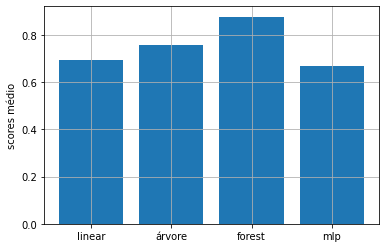

In [ ]:
# gráfico de barras comparando os valores de MSE entre os modelos

scores = [scores_linear.mean(), scores_arvore.mean(), scores_floresta.mean(), scores_mlp.mean()]
plt.bar(['linear', 'árvore', 'forest', 'mlp'], scores)
plt.ylabel('scores médio')
plt.grid(True)
plt.show()

---

**Conclusão**

É perceptível que a random forest teve um número maior de acertos, segundo os resultados da validação cruzada.


---

## **Conclusão geral**

De acordo com os testes de validação, com análises feitas através de método Holdout e cross validation, é possível chegar a conclusão de que a Random Forest é o melhor modelo de regressão para a previsão de preços de residências (baseado no dataset de House Sales in King County). 
  * A Random Forest pôde acertar cerca de 87% das instâncias apresentadas (análise com cross validation).
  * Segundo o Mean Absolute Percentage Error (MAPE), o módelo Random Forest teve 17% de erros, logo, teve 82% de acertos segundo essa análise.

É válida a observação de que o segundo modelo mais bem avaliado foi o da Árvore de Decisão, tendo um score médio de 75% (cross validation). Com MAPE, porém, teve 24% de erros.

Talvez seja possível o aumento de acertos com os vários modelos utilizados, esse objetivo poderia ser alcançado com:
  * Otimização de parâmetros.
  * Modificação dos dados do dataset. 
    * Remoção de colunas com alta correlatividade.
    * Remoção de colunas que podem ser consideradas inúteis.

Utilizando esses métodos a quantidade de acertos dos môdelos, principalmente da Random Forest, possivelmente, aumentaria.
